So, what we do here is take a list of genome fasta files and find all of the CTCF motifs in them.
We then take the Hi-C for that genome and can produce meta analyses to look for directionality of interactions
with respect to CTCF motifs. We'll do this for humans as a positive control and drosophila as a negative.
And then we can do it for any Hi-C you want. 

So we will download the fastas in genomes and the hics into maps and then provide latin names.
We use fimo to find motifs and we use use straw to pull out matrices from the .hics.
Will probably take a long time to run.

Things to consider:
Masking repetitive sequences
Lack of chromosome borders in the assembly
CTCF motif variability

Things to do as well:
Compute enrichment of CTCF motif in each genome. This proves that we got the motif right.
Compute log ratio of upstream downstream interactions with respect to motif orientation
Generate meta plot of CTCF site at the diagonal.

/programs/meme_4.12.0/scripts/fimo 

In [13]:
#now we need to scan each genome for CTCF motifs.
#We are going to want to be very stringent here
# we actually don't need to keep running this,
#since fimo generates a file we hold the file.

direc = "./raodata/"

name = "Spur_5.0"
fastasuffix = "_genomic.fna"
assemblysuffix = ".assembly"
hicsuffix = ".hic"

fimothresh = "1e-5"
name4fimo = name+"_"+fimothresh

motif_file = "/Zulu/mike/CTCF-Heger-R.meme"

fimocalls = "./"+name4fimo+"/fimo.txt"

draftfasta = direc + name + fastasuffix

assembly = direc + name + assemblysuffix




In [14]:
#so we open the fasta file, and we open the assembly file, 
#and make a new fasta file composed of all of the original contigs 

dfasta = open(draftfasta,'r')

chromnames = []
chromseqs = []

for line in dfasta:
    line = line.rstrip()
    if line.startswith('>'):
        chromnames.append(line.split()[0])
        chromseqs.append([])
    else:
        chromseqs[-1] += line
        

In [15]:
print(chromnames[:10])
print(chromseqs[0][:100])
print(len(chromnames))
print(len(chromseqs[0]))

['>NW_022144746.1', '>NW_022144747.1', '>NW_022144748.1', '>NW_022144749.1', '>NW_022144750.1', '>NW_022144751.1', '>NW_022144752.1', '>NW_022144753.1', '>NW_022144754.1', '>NW_022144755.1']
['c', 'g', 'a', 'a', 'c', 'a', 'a', 'c', 'g', 't', 'c', 'g', 'a', 'g', 't', 't', 't', 'g', 't', 'c', 't', 'a', 'g', 'a', 'a', 't', 't', 't', 'c', 'c', 't', 'a', 't', 'g', 't', 't', 'a', 'a', 'g', 'g', 't', 'a', 'g', 't', 't', 't', 't', 't', 'g', 'a', 't', 'c', 'g', 'a', 'g', 'a', 'c', 'a', 't', 'a', 'g', 'a', 'g', 'a', 'g', 'g', 'c', 'g', 'g', 't', 'g', 't', 't', 'g', 'c', 'a', 't', 'g', 'g', 'c', 'g', 'c', 't', 'g', 'a', 'c', 'a', 'g', 'g', 'c', 'c', 't', 't', 'g', 'c', 't', 'a', 't', 'g', 'g']
871
64836


In [16]:
def reverse_complement(seq):
    """
    Utility function for reverse complementing a DNA sequence
    """
    
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N', 'a': 't', 'c': 'g', 'g': 'c', 't': 'a', 'n': 'n'} 
    rseq = seq[::-1]
    return "".join(complement.get(base) for base in rseq)


s = "ATGCATGCTAGTACGNNAANaatgctcgn"
print(reverse_complement(s))

ncgagcattNTTNNCGTACTAGCATGCAT


In [17]:
#we then run fimo on this new fasta file
#we then convert to assembly coordinates using the rawchrom assembly
! /programs/meme_4.12.0/scripts/fimo --thresh $fimothresh --oc $name4fimo $motif_file $draftfasta

Using motif +CTCF of width 15.
Using motif -CTCF of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +SH1 of width 15.
Using motif -SH1 of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +SH2 of width 15.
Using motif -SH2 of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +SH3 of width 15.
Using motif -SH3 of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1
Using motif +SH4 of width 15.
Using motif -SH4 of width 15.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=1


In [18]:
#check out how many motifs were called
! wc -l $fimocalls
! head $fimocalls

47922 ./Spur_5.0_1e-5/fimo.txt
#pattern name	sequence name	start	stop	strand	score	p-value	q-value	matched sequence
SH2	NW_022145600.1	11774739	11774753	-	23.7347	2.93e-10	0.27	CCACCAGGGGCGGCC
SH2	NW_022145601.1	26125989	26126003	-	23.7347	2.93e-10	0.27	CCACCAGGGGCGGCC
CTCF	NW_022145614.1	2662064	2662078	-	23.7347	2.93e-10	0.339	CCACCAGGGGGCGCC
SH4	NW_022145597.1	19352682	19352696	+	23.5612	1.01e-09	1	CCACCGAAGGGCGCC
SH2	NW_022145604.1	22906525	22906539	-	23.5612	1.01e-09	0.464	CCACCAGAGGCGGCC
SH2	NW_022145604.1	23222649	23222663	-	23.5612	1.01e-09	0.464	CCACCAGAGGCGGCC
CTCF	NW_022145602.1	713690	713704	-	23.4082	1.44e-09	0.339	CCACCAGATGGCGCC
CTCF	NW_022145598.1	7482827	7482841	-	23.1735	2.15e-09	0.339	CCACCAGGGGGCGCT
CTCF	NW_022145598.1	20551027	20551041	-	23.1735	2.15e-09	0.339	CCACCAGGGGGCGCT


In [19]:
#here we compute the cumulative length of the genome while keeping track of the starting points of each contig/chromosome

import numpy as np

assem = open(assembly,'r')

chromsizes = np.zeros(len(chromnames))
cumlengths = np.zeros(len(chromnames))

cumulative = 0

for line in assem:
    li = line.split()
    if len(li) < 3:
        break
    i = chromnames.index(li[0])
    chromsizes[i] = int(li[2])
    cumlengths[i] = cumulative
    cumulative += int(li[2])
    
    
assem.close()


print(chromsizes[:10])
print(cumlengths[:10])

[64836. 60028. 57988. 56950. 47351. 44134. 38760. 32290. 30490. 29101.]
[8.33652318e+08 8.33717154e+08 8.33777182e+08 8.33835170e+08
 8.33892120e+08 8.33939471e+08 8.33983605e+08 8.34022365e+08
 8.34054655e+08 8.34085145e+08]


In [20]:
#here we read in the motifs from fimo and convert their coordinates into the assembly coordinates

fimo = open(fimocalls,'r') 

outfiles = []

header = fimo.readline()

maxrange = 400000
maxcount = 0
goodcount = 0

motifnames = []
motifcounts = []

for line in fimo:
    li = line.split()
    motif = li[0]
    if motif not in motifnames:
        motifnames.append(motif)
        outfiles.append(open(name4fimo+"_"+motif+"_motifs.bed",'w'))
        motifcounts.append(0)
    motifindex = motifnames.index(motif)
    motifcounts[motifindex] += 1
    scaf = li[1]
    if ">"+scaf not in chromnames:
        idcount += 1
        print(scaf)
        continue
    i = chromnames.index(">"+scaf)
    start = int(li[2])
    stop = int(li[3])
    idsize = chromsizes[i]
    if start < maxrange or idsize - stop < maxrange:
        maxcount += 1
        continue
    goodcount += 1
    strand = li[4]

    #now convert from real coordinates to assembly coordinates
    precedingsize = cumlengths[i]
    #mapping = 0.
    assstart = int(precedingsize + start)
    assstop = int(precedingsize + stop)
    
    
    outfiles[motifindex].write("\t".join(["assembly",str(assstart),str(assstop),strand+"\n"]))
    
for file in outfiles:
    file.close()
print(maxcount)
print(goodcount)

3729
44192


In [21]:
for motif in motifnames:
    filename = name4fimo+"_"+motif+"_motifs.bed"
    ! head $filename
    ! wc -l $filename

assembly	571665275	571665289	-
assembly	623298764	623298778	-
assembly	719392835	719392849	-
assembly	719708959	719708973	-
assembly	433926294	433926308	+
assembly	474730564	474730578	+
assembly	448028099	448028113	+
assembly	77315939	77315953	+
assembly	801219912	801219926	-
assembly	257183357	257183371	+
5912 Spur_5.0_1e-5_SH2_motifs.bed
assembly	321156774	321156788	-
assembly	632893812	632893826	-
assembly	492301278	492301292	-
assembly	505369478	505369492	-
assembly	590379733	590379747	+
assembly	883386959	883386973	+
assembly	401483906	401483920	+
assembly	542939023	542939037	-
assembly	875014219	875014233	-
assembly	100488267	100488281	+
17973 Spur_5.0_1e-5_CTCF_motifs.bed
assembly	470029433	470029447	+
assembly	627572568	627572582	-
assembly	310291162	310291176	-
assembly	768924804	768924818	-
assembly	256434314	256434328	+
assembly	291000206	291000220	+
assembly	656060594	656060608	+
assembly	160197234	160197248	-
assembly	160790220	160790234	-
assembly	94104067	94104081	+
7293

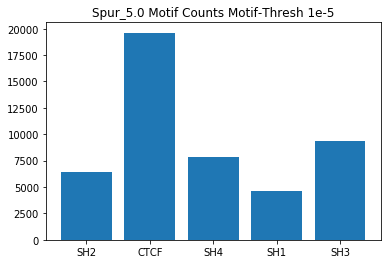

In [22]:
#here we will make a barchart showing the counts of each motif.
#we expect CTCF to be enriched, indicating the motif is conserved in this organism.

%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(len(motifcounts)),motifcounts, tick_label=motifnames)
plt.title("{0} Motif Counts Motif-Thresh {1}".format(name,fimothresh))
plt.show()

['SH2', 'CTCF', 'SH4', 'SH1', 'SH3']
40
Starting SH2
[0.5        0.50071637 0.4982686  0.50343779 0.50088361 0.49579964
 0.50027962 0.496689   0.50365977 0.49957273 0.50773962 0.49200262
 0.49292693 0.50346082 0.49680907 0.49240768 0.50825615 0.50011483
 0.49940021 0.50952113 0.50823549 0.50411744 0.50394999 0.5022212
 0.507258   0.50449211 0.50899458 0.50662682 0.49424686 0.51326475
 0.50000258 0.50484517 0.49796927 0.49449277 0.50356415 0.51408531
 0.49206091 0.50864813 0.49292269 0.50842282]
[0.5        0.50183569 0.50147653 0.49950845 0.49892732 0.49582322
 0.50422578 0.50416552 0.49571147 0.4930426  0.50069528 0.5013819
 0.50218744 0.49445711 0.49424183 0.49224649 0.49439073 0.49492963
 0.49924983 0.48590891 0.48609193 0.4987742  0.49157335 0.50842657
 0.49830645 0.50651014 0.50226309 0.50888291 0.51106479 0.49081286
 0.50593392 0.49837194 0.49961712 0.50186474 0.49791461 0.48563399
 0.48779448 0.48915967 0.49965621 0.50713695]
[0.         0.00837782 0.00940872 0.01034881 0.010954

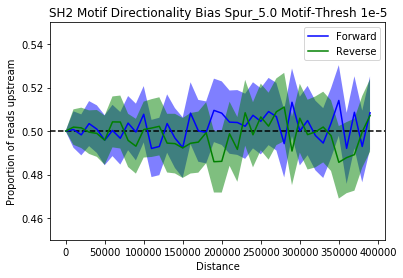

0.4989750322648448
0.4991869438750447
0.006616735235796762
0.006215322250752277


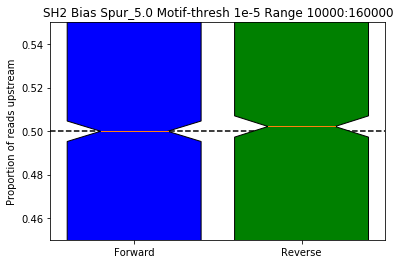

Starting CTCF
[0.5        0.49985836 0.50296087 0.50676553 0.5101459  0.51042114
 0.51049302 0.50975662 0.51327288 0.51151234 0.50801025 0.50824332
 0.51098072 0.50840847 0.50968342 0.51907132 0.50825364 0.50525227
 0.50624026 0.50683175 0.50779455 0.50252527 0.50859681 0.50115444
 0.51315719 0.50172836 0.50432343 0.51050799 0.5005101  0.49483773
 0.50340666 0.50533549 0.51153053 0.50380278 0.4993117  0.5076442
 0.49776714 0.49549464 0.5029949  0.49497133]
[0.5        0.4988527  0.49929912 0.4980489  0.49306824 0.49407959
 0.48900014 0.48760248 0.48812489 0.4937906  0.49584916 0.48743928
 0.48578023 0.49483733 0.48944913 0.49039884 0.49192006 0.49216997
 0.49543323 0.48358814 0.48896602 0.49906688 0.49706578 0.49248434
 0.49440827 0.491613   0.49352023 0.4954637  0.4896655  0.49180673
 0.50049943 0.4939395  0.49332695 0.49375371 0.49408559 0.49538438
 0.49076222 0.49842274 0.49562409 0.50186819]
[0.         0.00524321 0.00571587 0.0063923  0.00678602 0.00711291
 0.00737587 0.00763633 0

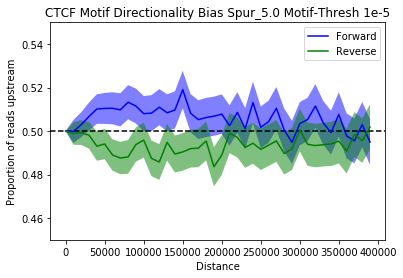

0.5041057583966692
0.49351912347943816
0.0040927729150253426
0.00403315867484614


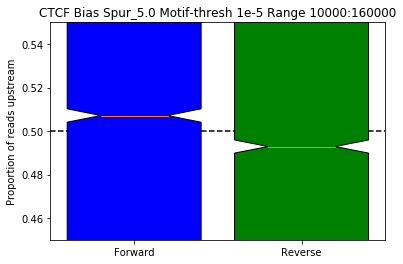

Starting SH4
[0.5        0.49974776 0.4969564  0.50304712 0.49622835 0.50663216
 0.50584478 0.496006   0.49310116 0.49716329 0.49253822 0.50047608
 0.49703006 0.49856909 0.48699133 0.50351552 0.4917672  0.4921943
 0.49387443 0.4998936  0.48716158 0.50169327 0.49721664 0.49968802
 0.50063304 0.50611378 0.4948641  0.49041911 0.48845728 0.49535156
 0.48977323 0.5020454  0.50691899 0.49582041 0.48744027 0.49076694
 0.48200225 0.49224081 0.50041271 0.48999298]
[0.5        0.49585665 0.5015674  0.50288742 0.50570448 0.50206866
 0.5051207  0.49686754 0.49856027 0.50127667 0.49837887 0.49753449
 0.51047638 0.50632456 0.50596601 0.50308077 0.50770257 0.49795767
 0.49767732 0.50140169 0.49935448 0.49871449 0.4911613  0.51088057
 0.49824252 0.49670736 0.49740671 0.5031823  0.50653328 0.50930365
 0.49976012 0.49775898 0.4877729  0.49646318 0.49277356 0.5062855
 0.50110465 0.49729665 0.50594937 0.50208775]
[0.         0.00722083 0.00832277 0.00922797 0.00976587 0.01019069
 0.01075158 0.01076459 0.0

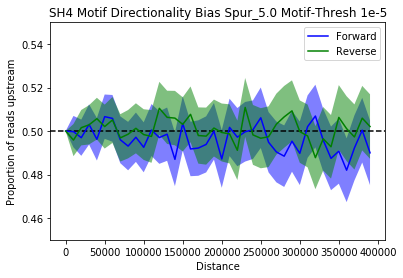

0.4987429359685296
0.495012165624051
0.005618517504392194
0.005778487786084759


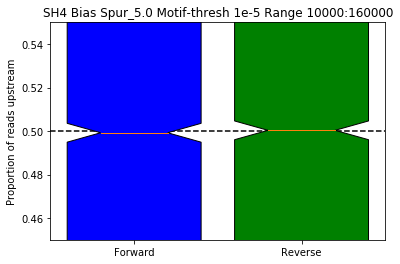

Starting SH1
[0.5        0.50370773 0.49803223 0.50223197 0.50192305 0.50522234
 0.50543583 0.50761931 0.50328966 0.49872019 0.49530533 0.5104512
 0.5151525  0.48879535 0.49722951 0.50676004 0.50948173 0.50585643
 0.48884398 0.50137701 0.5040734  0.49323447 0.50094952 0.51985714
 0.51136123 0.5128778  0.50122102 0.50603158 0.51015709 0.50538519
 0.51464568 0.51076471 0.50082438 0.50341529 0.49983245 0.51548565
 0.50328592 0.49290975 0.49304266 0.49678582]
[0.5        0.50414375 0.49822864 0.5030091  0.50112886 0.48652111
 0.50254062 0.50743531 0.50993443 0.51791203 0.51761678 0.5123462
 0.50438681 0.5065291  0.51002891 0.50757021 0.50349998 0.50383083
 0.50194805 0.51464381 0.51416506 0.50276809 0.50022859 0.51267953
 0.50874372 0.51087989 0.49971466 0.50425845 0.50008351 0.50545566
 0.51102103 0.52047428 0.50899485 0.51006202 0.51061984 0.51556774
 0.51625988 0.52386357 0.50776983 0.50413725]
[0.         0.00950472 0.01073454 0.01170373 0.01249598 0.01329753
 0.01354665 0.01412361 0.0

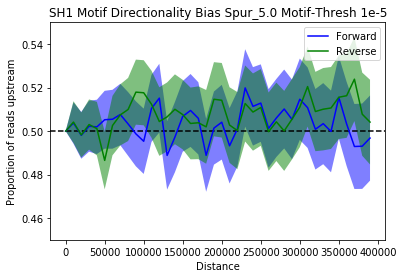

0.5035871592891421
0.5023044852337714
0.007686536940000702
0.007602038034079519


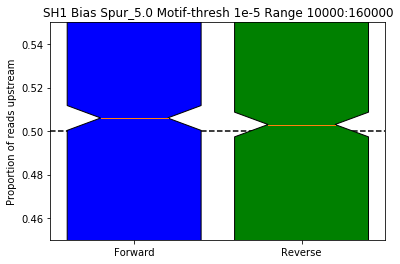

Starting SH3
[0.5        0.50583826 0.49902278 0.50844218 0.50803218 0.50874773
 0.50970112 0.50896739 0.50930931 0.49836988 0.50711579 0.51321208
 0.50821125 0.5095505  0.50446342 0.49966269 0.49056953 0.49644687
 0.50585375 0.50400125 0.50606205 0.49929883 0.49564407 0.4955649
 0.49442713 0.50495021 0.48409872 0.49194473 0.49351668 0.50404006
 0.49049774 0.49212832 0.50128934 0.49704684 0.49781607 0.48959746
 0.49891975 0.50431788 0.49915904 0.5040983 ]
[0.5        0.49958996 0.50164723 0.50458341 0.49775256 0.50238351
 0.50010045 0.50062498 0.50043947 0.50161599 0.50359811 0.50032707
 0.50252822 0.49835346 0.50223089 0.50022371 0.5079295  0.5036346
 0.49854783 0.48981069 0.5030588  0.49573587 0.49478515 0.50115873
 0.50341083 0.49715969 0.50907275 0.49676772 0.49969556 0.49925657
 0.50406886 0.49855968 0.51577265 0.50361276 0.5029949  0.50354348
 0.5031223  0.49162556 0.49703799 0.50348791]
[0.         0.00685995 0.00772414 0.00858464 0.00918247 0.00968526
 0.00994083 0.01024163 0.0

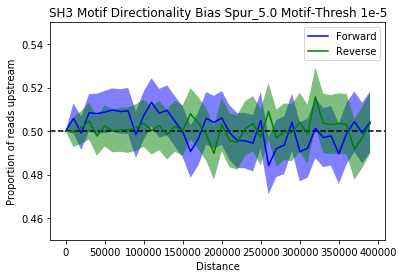

0.504202869758916
0.5018488858425225
0.005424807415067682
0.005362489022028228


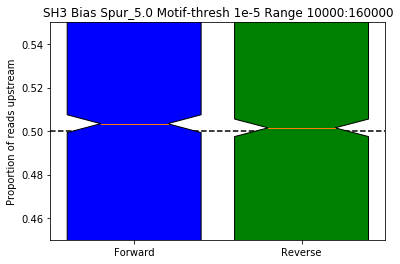

In [23]:
#here we will count the interactions coming from each motif going upstream and downstream.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

#now we have scanned each genome for motifs we have a motif file

hics = []
motifs = []

for m in motifnames:
    hics.append(direc+name+hicsuffix)
    motifs.append(m)
    
print(motifs)

resolution = 10000
res = str(resolution)
maxdist = int((maxrange)//resolution)

print(maxdist)

#for each genome we want to load in the assembly, load in the motifs, and then just make the directionality plot.
#seems simple enough.

chrom1 = "assembly"
chrom2 = "assembly"

for hicfile,motif in zip(hics,motifs):
    print("Starting {0}".format(motif))
    fbins = []
    rbins = []
    motiffile = open(name4fimo+"_"+motif+"_motifs.bed",'r')
    for line in motiffile:
        li = line.split()
        start = int(li[1])//resolution
        stop = int(li[2])//resolution
        strand = li[3]
        if strand == '+':
            fbins.append(start)
        elif strand == '-':
            rbins.append(stop)
        else:
            print("surely not")
    

    fbins = sorted(list(set(fbins)))
    rbins = sorted(list(set(rbins)))
    fi = 0
    ri = 0
    while fi < len(fbins) and ri < len(rbins):
        if fbins[fi] == rbins[ri]:
            del fbins[fi]
            del rbins[ri]
            #fi -= 1
            #ri -= 1
            continue
        if fbins[fi] > rbins[ri]:
            ri += 1
        else:
            fi += 1

    #fbins = set(fbins)
    #rbins = set(rbins)
    
    #now we have our motif lists we need to grab the hic map.
    hic_ijv = ! java -jar /hdisk3/jordan/juicebox_tools.jar dump observed KR $hicfile $chrom1 $chrom2 BP $res | grep -v INFO | grep -v HiC
    
    fbins_up = np.zeros([maxdist,len(fbins)])
    fbins_down = np.zeros([maxdist,len(fbins)])
    rbins_up = np.zeros([maxdist,len(rbins)])
    rbins_down = np.zeros([maxdist,len(rbins)])
    
    
    for line in hic_ijv:
        li = line.split()
        left = int(li[0])//resolution
        right = int(li[1])//resolution
        dist = right-left
        if dist >= maxdist:
            continue
        KRscore = np.nan_to_num(float(li[2]))
        
        if left in fbins:
            fbins_down[dist,fbins.index(left)] = KRscore
        elif left in rbins:
            rbins_down[dist,rbins.index(left)] = KRscore
        if right in fbins:
            fbins_up[dist,fbins.index(right)] = KRscore
        elif right in rbins:
            rbins_up[dist,rbins.index(right)] = KRscore
    
    #now we calculate mean and variance for each distance
    fn = len(fbins)
    rn = len(rbins)
    
    ferror = np.zeros(maxdist)
    rerror = np.zeros(maxdist)
    fmeans = np.zeros(maxdist)
    rmeans = np.zeros(maxdist)
    
    confidence = 0.95
    for d in range(maxdist):
        f_p = []
        for up,down in zip(fbins_up[d],fbins_down[d]):
            if not up+down:
                continue
            else:
                f_p.append(up/(up+down))
        
        #print("f_p len:")
        #print(len(f_p))
        f_m = np.mean(f_p)
        f_se = scipy.stats.sem(f_p)
        f_h = f_se * scipy.stats.t.ppf((1 + confidence) / 2., fn-1)
        
        
        #print(f_m)
        #print(f_h)
        
        fmeans[d] = f_m
        ferror[d] = f_h
        
        r_p = []
        for up,down in zip(rbins_up[d],rbins_down[d]):
            if not up+down:
                continue
            else:
                r_p.append(up/(up+down))
        
        
        #print("r_p len:")
        #print(len(r_p))
        r_m = np.mean(r_p)
        r_se = scipy.stats.sem(r_p)
        r_h = r_se * scipy.stats.t.ppf((1 + confidence) / 2., rn-1)
        
        #print(r_m)
        #print(r_h)
        
        rmeans[d] = r_m
        rerror[d] = r_h
        
        
        
        
    print(fmeans)
    print(rmeans)
    print(ferror)
    print(rerror)
    
        
    #do some plotting
    x = range(0,maxrange,resolution)
    plt.axhline(y=0.5,color='k',linestyle='--')
    plt.plot(x,fmeans,'b-', label="Forward")
    plt.plot(x,rmeans,'g-', label="Reverse")
    plt.fill_between(x, fmeans+ferror, fmeans-ferror, facecolor='blue', alpha=0.5)
    plt.fill_between(x, rmeans+rerror, rmeans-rerror, facecolor='green', alpha=0.5)
    plt.title("{2} Motif Directionality Bias {0} Motif-Thresh {1}".format(name,fimothresh,motif))
    plt.ylim(0.45,0.55)
    plt.xlabel("Distance")
    plt.ylabel("Proportion of reads upstream")
    
    #xlocs = np.arange(0,maxdist,step=5)
    #xlabels = [str(x) for x in (xlocs * resolution)]
    #plt.xticks(xlocs,xlabels)
    plt.legend()
    #plt.savefig("./figs/"+name+".svg",format="svg")
    
    plt.show()
    
    
    #Now sum all distances except 0
    
    ferrorsum = 0
    rerrorsum = 0
    fmeanssum = 0
    rmeanssum = 0
    
    confidence = 0.95
    tot_start = 1
    tot_stop = 16

    f_p = []
    for x in range(len(fbins)):
        u = sum(fbins_up[tot_start:tot_stop,x])
        d = sum(fbins_down[tot_start:tot_stop,x])
        if not u+d:
            continue
        else:
            f_p.append(u/(u+d))
        

    f_m = np.mean(f_p)
    f_se = scipy.stats.sem(f_p)
    f_h = f_se * scipy.stats.t.ppf((1 + confidence) / 2., fn-1)

    #print(f_m)
    #print(f_h)

    fmeanssum = f_m
    ferrorsum = f_h
    
    r_p = []
    for x in range(len(rbins)):
        u = sum(rbins_up[tot_start:tot_stop,x])
        d = sum(rbins_down[tot_start:tot_stop,x])
        if not u+d:
            continue
        else:
            r_p.append(u/(u+d))

    r_m = np.mean(r_p)
    r_se = scipy.stats.sem(r_p)
    r_h = r_se * scipy.stats.t.ppf((1 + confidence) / 2., rn-1)

    #print(r_m)
    #print(r_h)

    rmeanssum = r_m
    rerrorsum = r_h
    
    
    print(fmeanssum)
    print(rmeanssum)
    print(ferrorsum)
    print(rerrorsum)
    plt.axhline(y=0.5,color='k',linestyle='--')
    box = plt.boxplot([f_p,r_p],labels=['Forward','Reverse'],widths=0.8,patch_artist=True,notch=True)
    plt.ylabel("Proportion of reads upstream")
    tstart = str(tot_start*resolution)
    tstop = str(tot_stop*resolution)
    plt.title("{4} Bias {0} Motif-thresh {1} Range {2}:{3}".format(name,fimothresh,tstart,tstop,motif))
    colors = ["blue","green"]
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.ylim(0.45,0.55)
    plt.show()
    
        
    
    